# Assignment 4 — Linear Regression (Enhanced Version)
Tämä versio sisältää kaikki pyydetyt kaaviot selkeästi oikeilla paikoillaan.

## Part 1 — Data exploration
Tutkimme dataa askel askeleelta ja lisäämme histogrammit, pairplotit ja korrelaatiokartan.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = df = pd.read_csv("autoMPG.csv")
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,"5,6","5,6",18,8,"3,07","1,3","3,504",12,70,1,1,1,0,0,chevrolet chevelle malibu
1,"6,7","6,7",15,8,"3,5","1,65","3,693","11,5",70,1,1,1,0,0,buick skylark 320
2,"5,6","5,6",18,8,"3,18","1,5","3,436",11,70,1,1,1,0,0,plymouth satellite
3,"6,3","6,3",16,8,"3,04","1,5","3,433",12,70,1,1,1,0,0,amc rebel sst
4,"5,9","5,9",17,8,"3,02","1,4","3,449","10,5",70,1,1,1,0,0,ford torino


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GallonsPer100Miles        392 non-null    object
 1   GallonsPer100MilesTo1981  362 non-null    object
 2   MPG                       392 non-null    object
 3   Cylinders                 392 non-null    int64 
 4   Displacement100ci         392 non-null    object
 5   Horsepower100             392 non-null    object
 6   Weight1000lb              392 non-null    object
 7   Seconds0to60              392 non-null    object
 8   Year                      392 non-null    int64 
 9   Year70To81                392 non-null    int64 
 10  Origin                    392 non-null    int64 
 11  Origin.Eq.1               392 non-null    int64 
 12  Origin.Eq.2               392 non-null    int64 
 13  Origin.Eq.3               392 non-null    int64 
 14  Name                      

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cylinders,392.0,5.471939,1.705783,3.0,4.0,4.0,8.0,8.0
Year,392.0,75.979592,3.683737,70.0,73.0,76.0,79.0,82.0
Year70To81,392.0,0.923469,0.266185,0.0,1.0,1.0,1.0,1.0
Origin,392.0,1.576531,0.805518,1.0,1.0,1.0,2.0,3.0
Origin.Eq.1,392.0,0.625000,0.484742,0.0,0.0,1.0,1.0,1.0
Origin.Eq.2,392.0,0.173469,0.379136,0.0,0.0,0.0,0.0,1.0
Origin.Eq.3,392.0,0.201531,0.401656,0.0,0.0,0.0,0.0,1.0


### Histogrammit

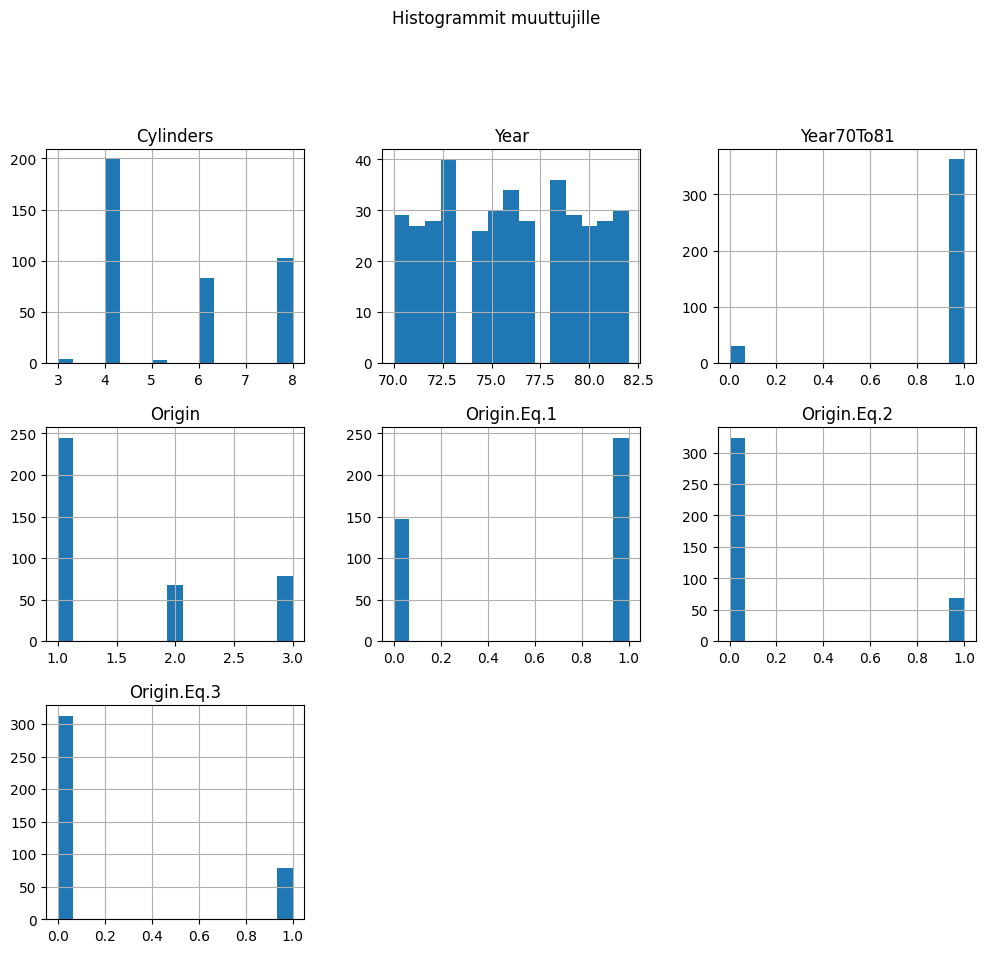

In [ ]:
df.hist(figsize=(12,10), bins=15)
plt.suptitle('Histogrammit muuttujille', y=1.02)
plt.show()

### Pairplot (scatter-plot matrix)

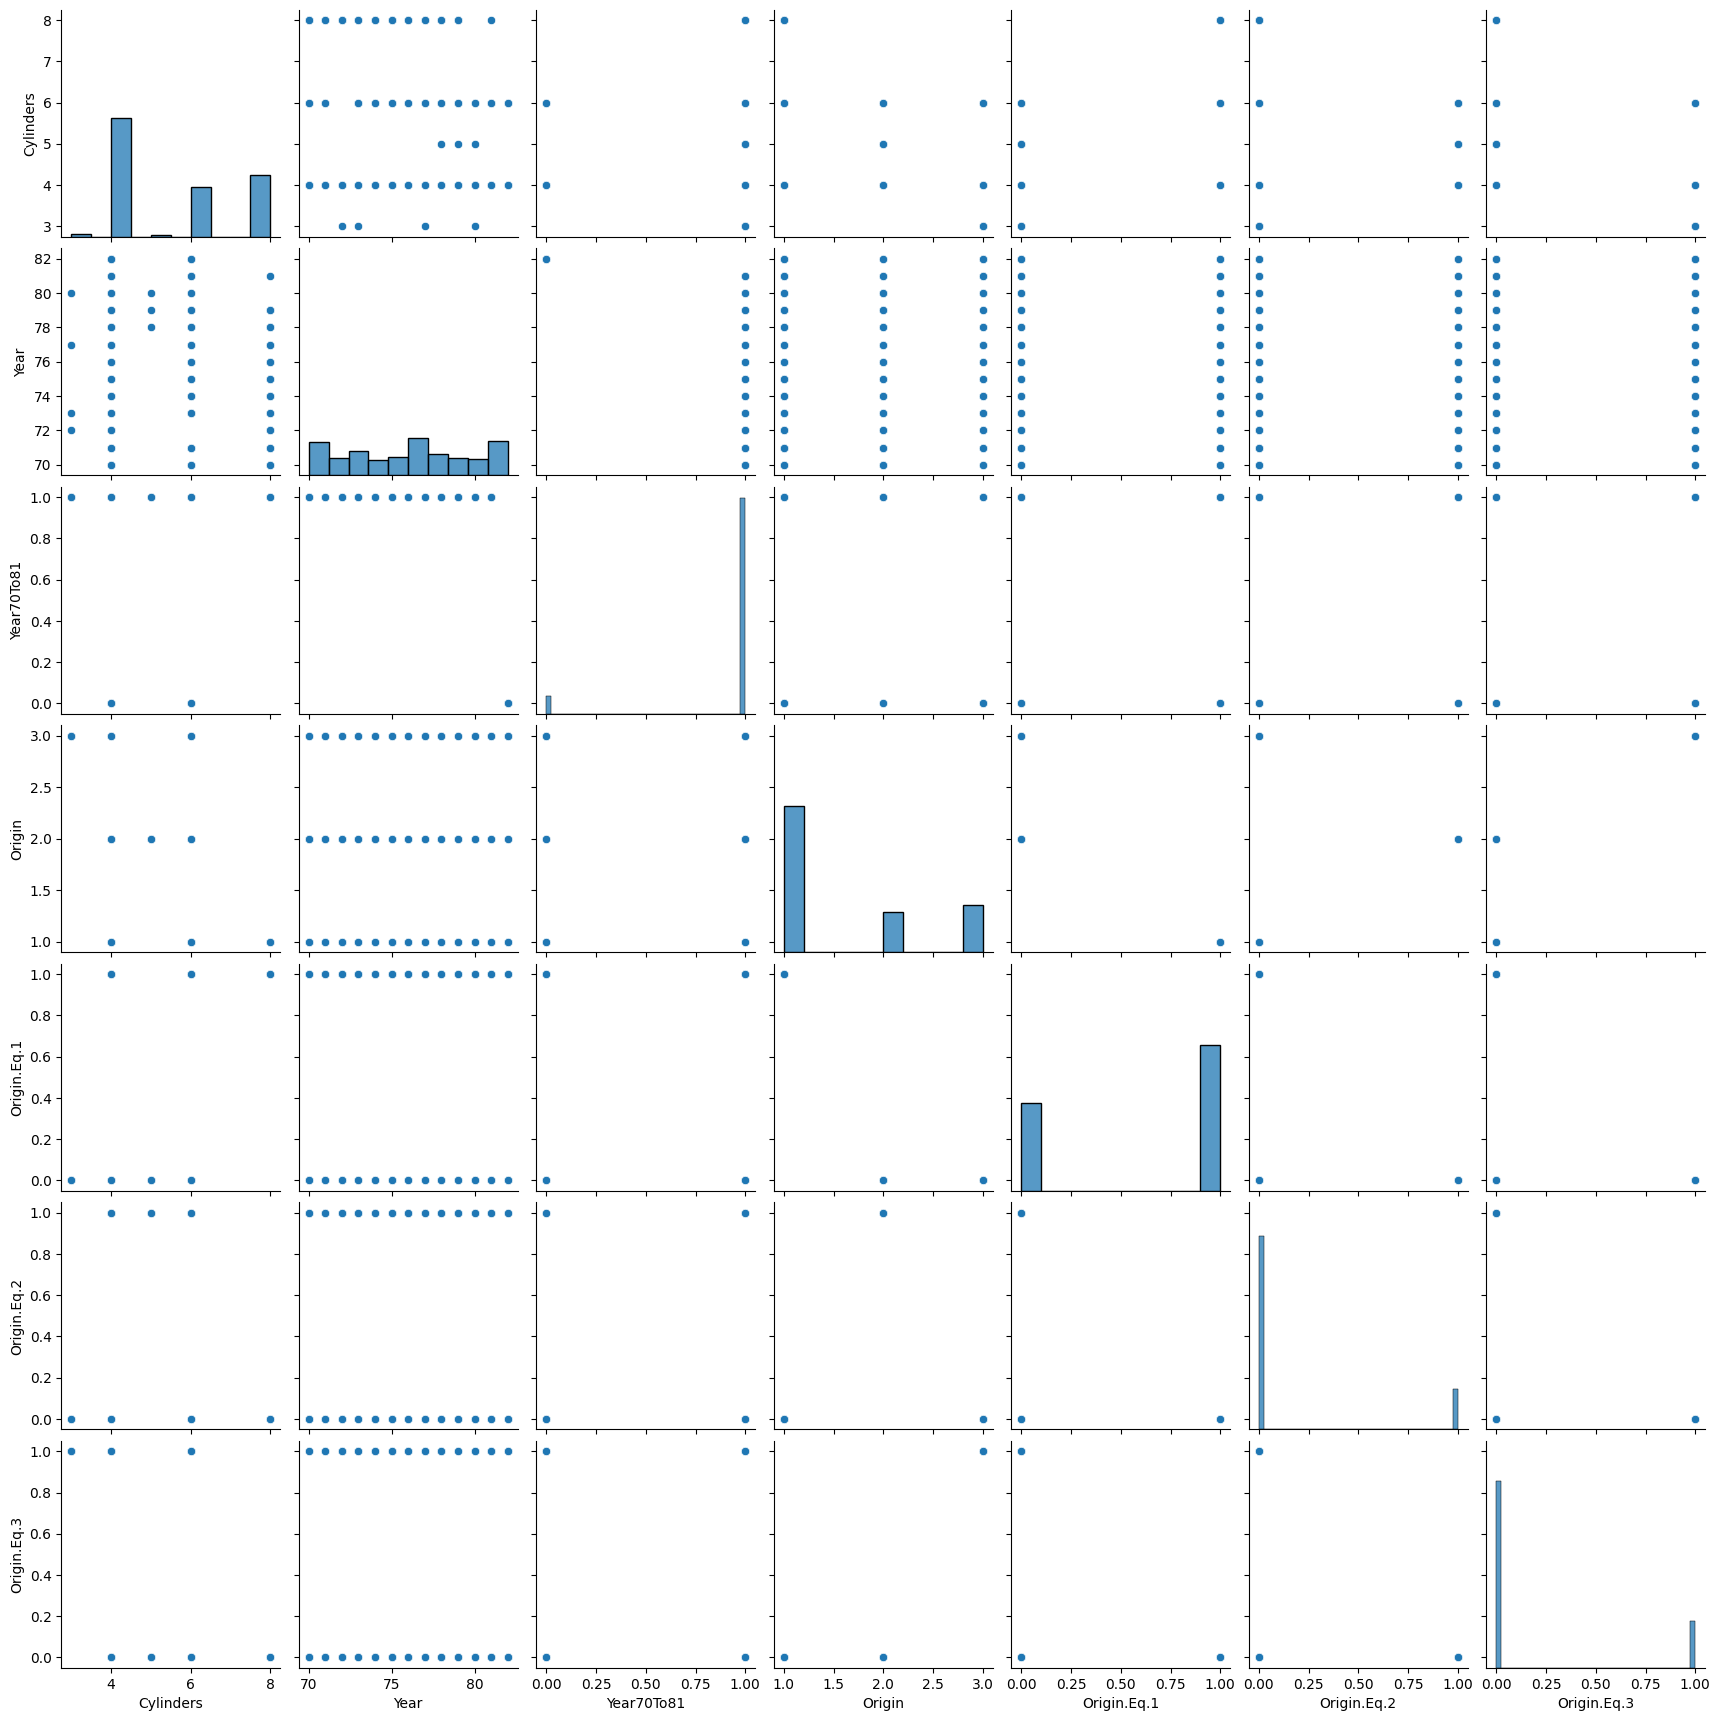

In [13]:
import seaborn as sns
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

### Korrelaatiomatriisi ja heatmap

In [14]:
corr = df.select_dtypes('number').corr()
corr

,Cylinders,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
Cylinders,1.000000,-0.345647,0.214933,-0.568932,0.610494,-0.352324,-0.404209
Year,-0.345647,1.000000,-0.471084,0.181528,-0.136065,-0.037745,0.199841
Year70To81,0.214933,-0.471084,1.000000,-0.032254,-0.004955,0.081198,-0.070666
Origin,-0.568932,0.181528,-0.032254,1.000000,-0.925180,0.241148,0.888933
Origin.Eq.1,0.610494,-0.136065,-0.004955,-0.925180,1.000000,-0.591434,-0.648583
Origin.Eq.2,-0.352324,-0.037745,0.081198,0.241148,-0.591434,1.000000,-0.230157
Origin.Eq.3,-0.404209,0.199841,-0.070666,0.888933,-0.648583,-0.230157,1.000000


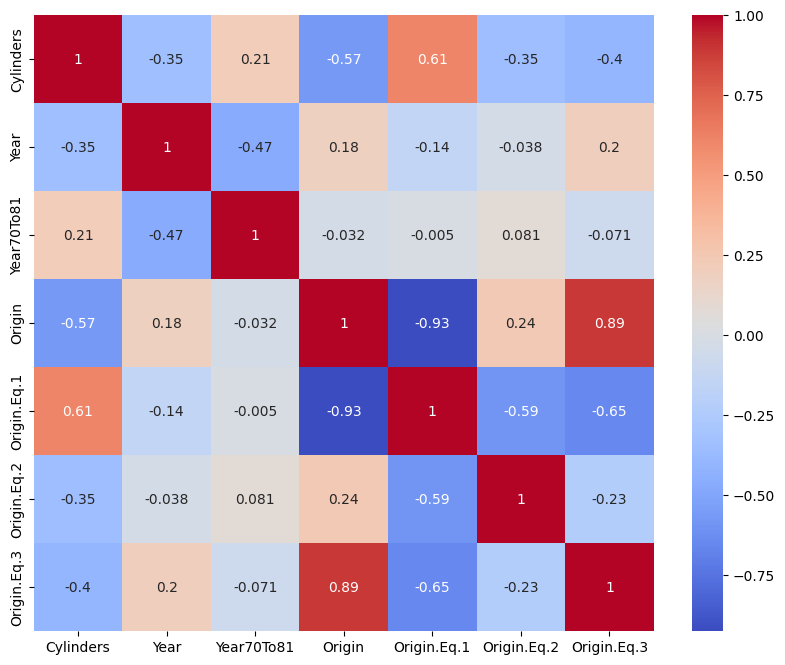

In [15]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Yksinkertainen lineaarinen regressio
Testataan jokainen muuttuja yksitellen.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

if 'GallonsPer100Miles' not in df.columns:
    mpg = [c for c in df.columns if 'mpg' in c.lower()][0]
    df['GallonsPer100Miles'] = 100 / df[mpg]

results=[]
for col in df.select_dtypes('number').columns:
    if col=='GallonsPer100Miles': continue
    X=df[[col]]
    y=df['GallonsPer100Miles']
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
    m=LinearRegression().fit(X_train,y_train)
    r2=r2_score(y_test,m.predict(X_test))
    results.append((col,r2))

import pandas as pd
pd.DataFrame(results,columns=['Predictor','R2']).sort_values('R2',ascending=False)

ValueError: could not convert string to float: '3,2'

### Esimerkki scatterplot + regression line parhaalle yksittäiselle muuttujalle

In [ ]:
best = sorted(results, key=lambda x:x[1], reverse=True)[0][0]

import numpy as np
X=df[[best]]
y=df['GallonsPer100Miles']
model=LinearRegression().fit(X,y)
pred=model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y)
plt.plot(X, pred)
plt.title(f'Regression line for {best}')
plt.xlabel(best); plt.ylabel('GallonsPer100Miles')
plt.show()

## Part 2 — Kolmen muuttujan paras malli

In [ ]:
from itertools import combinations
triplet_scores=[]

predictors=df.select_dtypes('number').columns.drop('GallonsPer100Miles')

for trip in combinations(predictors,3):
    X=df[list(trip)]
    y=df['GallonsPer100Miles']
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
    model=LinearRegression().fit(X_train,y_train)
    pred=model.predict(X_test)
    triplet_scores.append((trip,r2_score(y_test,pred)))

best_triplet = sorted(triplet_scores,key=lambda x:x[1],reverse=True)[0]
best_triplet

### Residuaalikaaviot

In [ ]:
best_vars=list(best_triplet[0])
X=df[best_vars]
y=df['GallonsPer100Miles']

model=LinearRegression().fit(X,y)
res=y-model.predict(X)

# Residuaalit vs ennusteet
plt.figure(figsize=(8,5))
plt.scatter(model.predict(X),res)
plt.axhline(0,color='black')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted'); plt.ylabel('Residual')
plt.show()

# Histogrammi residuaaleille
plt.figure(figsize=(8,5))
plt.hist(res,bins=20)
plt.title('Residual histogram')
plt.show()

### Interpolaatio ja ekstrapolaatio ennusteet

In [ ]:
mean_vals=X.mean()
std_vals=X.std()

interp = pd.DataFrame([mean_vals, mean_vals + 0.5*std_vals])
extra = pd.DataFrame([mean_vals + 3*std_vals])

print("Interpolaatio ennusteet:")
print(model.predict(interp))

print("
Ekstrapolaatio ennusteet:")
print(model.predict(extra))